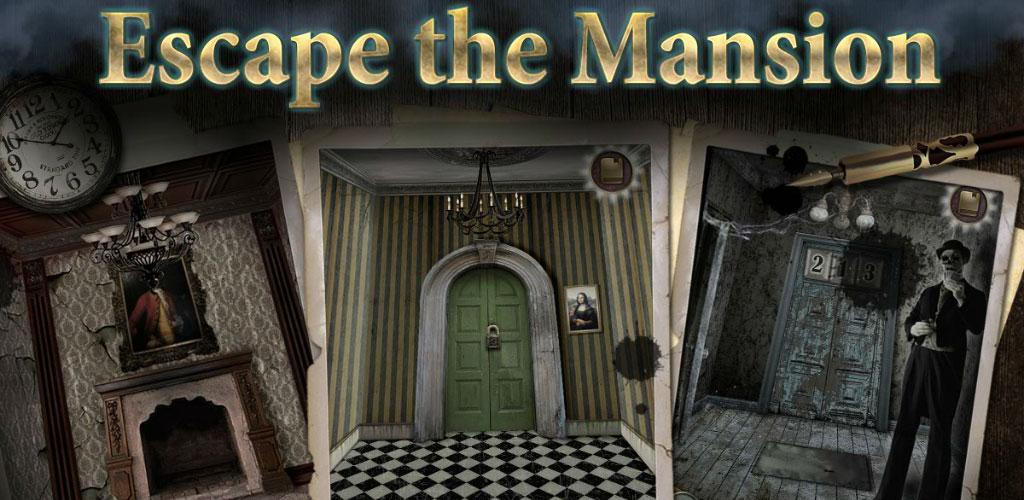

In [21]:
rooms_EG = {
    'Hallway': {
        'description': 'The hallway is dim and narrow, lit by flickering bulbs that cast long, twitching shadows along peeling, damp-stained walls.\nEach step echoes with a hollow creak, and the air grows colder, thick with the scent of rust and something long dead.\nAt the far end, a pitch-black void waits—silent, watching, and horribly patient.',
        'connections': {
            'Library': {
                'locked': True,
                'key': 'Library Key'
            },                 
            'Dining Room': {
                'locked': True,
                'key': 'Dining Room Key'
            },                 
            'Kitchen': {
                'locked': True,
                'key': 'Kitchen Key'
            },
            'Main Door': {
                'locked': True,
                'key': 'Main Door Key'
            }
        },        
        'items': {            
            "Trash": {
                "description": "A pile of trash festers on the floor, crawling with maggots and exhaling a foul stench.",                
                "result_description": "You find a key",
                "result": "Dining Room Key"
            }
        }
    },
    'Library': {
        'description': 'The library is deathly silent, its towering shelves crammed with ancient, dust-choked books that seem to whisper as you pass, while something unseen moves just beyond the candlelit gloom.',
        'connections': {
            'Hallway': {
                'locked': True,
                'key': 'Library Key'
            },                 
            'Bedroom': {
                'locked': True,
                'key': 'Bedroom Key'
            }
        },
        'items': {
            "Reading desk": {
                "description": "An ordinary shelve.",                
                "result_description": "You search the entire desk and find a magnifying glass",
                "result": "Magnifying glass"
            },
            "Shelves": {
                "description": "An ordinary shelve.",                
                "result_description": "You find a key between the books",
                "result": "Library Key"
            }   ,
            "Globe": {
                "description": "The Globe spins as you touch it",                
                "result_description": "Nothing noteworthy can be found",
                "result": None
            }          
        }
    },
    'Bedroom': {
        'description': 'The bedroom is cold and still, its bed perfectly made despite the deep, human-shaped impression in the mattress and the sound of slow, ragged breathing coming from the dark closet.',
        'connections': {
            'Library': {
                'locked': True,
                'key': 'Bedroom Key'
            }
        },
        'items': {
            "Bedside table": {
                "description": "The bedside table is covered in a thick layer of dust, with a cracked, flickering lamp casting eerie shadows over scattered, yellowed papers stained with dark, unidentifiable smudges.",
                "result_description": "You find a key between the papers",
                "result": "Bedroom Key",
            },
            "Bed": {
                "description": "A human-shaped impression in the mattress",                
                "result_description": "Your hands touch a bloodstain as you examine the sheets, but you find nothing of value",
                "result": None
            },
            "Closet": {
                "description": "The sound gets louder the closer you get to the closet",                
                "result_description": "You find nothing as you inspect the closet - the sound must be the wind",
                "result": None
            }
        }
    },
    'Dining Room': {
        'description': 'The dining room is frozen in time, its long table set for a feast no one ever came to, with cobweb-covered chairs and rotting food, while faint scratching sounds echo from beneath the floorboards.',
        'connections': {
            'Hallway': {
                'locked': True,
                'key': 'Dining Room Key'
            },                 
            'Kitchen': {
                'locked': True,
                'key': 'Kitchen Key'
            }
        },
        'items': {
            "Table": {
                "description": "An ordinary table.",                
                "result_description": "long table set for a feast no one ever came to, with cobweb-covered chairs and rotting food - nothing of use here",
                "result": None
            },
            "Torn Family Portrait": {
                "description": "Hung crooked on the wall, with faces scratched out, and a date that hasn't happened yet.",                
                "result_description": "You find a key lying loosely on the frame",
                "result": "Kitchen Key"
            }


        }
    },
    'Kitchen': {
        'description': 'The kitchen reeks of spoiled meat and burnt metal, with bloodstained knives still wet on the counter and the oven door slowly creaking open on its own.',
        'connections': {
            'Hallway': {
                'locked': True,
                'key': 'Kitchen Key'
            },                 
            'Dining Room': {
                'locked': True,
                'key': 'Kitchen Key'
            }
        },
        'items': {
            "spoiled meat": {
                "description": "Spoiled meat.",                
                "result_description": "Flees fly around the meat and maggots feast on the inners - nothing useful here",
                "result": None
            },
            "bloodstained knives": {
                "description": "A bloodstained knives.",               
                "result_description": "You pick up the bloodstained knifes",
                "result": "Bloodstained knifes"
            },
            "oven": {
                "description": "An ordinary oven.",               
                "result_description": "You find a key inside the oven",
                "result": "Main Door Key"
            }
        }
    }
}






In [ ]:
from typing import Dict, List
import time

class Room:
    def __init__(self, name, description, connections, items) -> None:
        self.name = name  # The name of the room
        self.description = description  # A short description of the room
        self.connections = connections  # A list of Door objects that connect this room to other rooms
        self.items = items  # A list of Item objects available in this room

class Item:
    def __init__(self, name, description, result_description, result):
        self.name = name  # The name of the item
        self.description = description  # A detailed description of the item        
        self.result = result  # What the player receives if they interact successfully (e.g., a crafted item)
        self.result_description = result_description  # Message shown when the item is examined and not yet in inventory

    # Method to examine the item and optionally add its result to inventory
    def examine(self, inventory):
        print(f"  You examine: {self.name}", flush=True)  # Print the item's name
        print(f"  {self.description}", flush=True)  # Print the item's description
        
        # If the resulting item is not already in the player's inventory
        if not self.result in inventory:
            print(f"  {self.result_description}", flush=True)  # Print what the player discovers or receives
            return self  # Return the item object for further interaction
        else:
            # If the item result is already in the inventory, no need to repeat the action
            return None
        
class Player:
    # Initialize the player with a starting room and an empty inventory
    def __init__(self, current_room: Room):
        self.current_room = current_room  # The room the player is currently in
        self.inventory = []               # A list to store items the player collects
        self.rooms_seen = set()     
        self.rooms_seen.add(current_room.name)    
        self.killed_zombie = False

    # Move the player to a new room
    def move(self, new_room: Room):
        self.current_room = new_room  # Update the current room
        print(f"You moved to a new room: {self.current_room.name}", flush=True)  # Inform the player
        print(f"{self.current_room.description}", flush=True) # Show the room's description
        if not new_room.name in self.rooms_seen:
            self.rooms_seen.add(new_room.name)
        
    def get_rooms_seen(self):
        return self.rooms_seen.copy()

    # Add an item to the player's inventory
    def add_item_to_inventory(self, item: Item):       
        if item.result is not None:  # Check if the item has a result (i.e. it's a valid item)
            print(f"You added {item.result} to your Inventory", flush=True)  # Notify the player
            self.inventory.append(item.result)  # Add the item result to the inventory

class Door:
    def __init__(self, name, connecting_room, locked, key):
        self.name = name      # The name or identifier of the door (e.g., "north door")
        self.connecting_room = connecting_room
        self.locked = locked  # Boolean indicating whether the door is locked
        self.key = key        # The key item required to unlock the door

    # Method to examine the door and possibly unlock it
    def examine(self, p: Player ):
        
        inventory = p.inventory
        if self.name == p.current_room.name:
            # direction of the connection has to be reversed

            print(f"  You examine: {self.connecting_room}", flush=True)  # Display the door being examined
            # If the required key is in the player's inventory and the door is locked
            if self.key in inventory and self.locked:
                self.locked = False  # Unlock the door
                print("  You unlock the door using your key", flush=True) # Inform the player
                return str(self.connecting_room)  # Return the door's name as a confirmation

            # If the door is still locked and the player doesn't have the key
            elif self.locked:
                print(f"  The door is locked", flush=True) # Inform the player
                return None  # Indicate that access is denied

            # If the door is already unlocked
            else:
                print("  The door is unlocked", flush=True) # Inform the player
                return str(self.connecting_room)  # Return the door's name as a confirmation

        else:
            print(f"  You examine: {self.name}", flush=True)  # Display the door being examined

            # If the required key is in the player's inventory and the door is locked
            if self.key in inventory and self.locked:
                self.locked = False  # Unlock the door
                print("  You unlock the door using your key", flush=True) # Inform the player
                return str(self.name)  # Return the door's name as a confirmation

            # If the door is still locked and the player doesn't have the key
            elif self.locked:
                print(f"  The door is locked", flush=True) # Inform the player
                return None  # Indicate that access is denied

            # If the door is already unlocked
            else:
                print("  The door is unlocked", flush=True) # Inform the player
                return str(self.name)  # Return the door's name as a confirmation

    
class GameState:
    def __init__(self, p: Player, rooms):
        self.p = p
        self.rooms = rooms
        self.start_time = time.time()

def initialize_rooms(rooms):
    room_objects = {}  # Dictionary to hold final Room instances

    # Loop over each room defined in the input dictionary
    for room_name, room_data in rooms.items():
        raw_items = room_data.get('items', {})  # Retrieve the raw items dictionary

        # Convert each item dictionary into an Item instance
        items_obj = {}
        for item_name, item_info in raw_items.items():
            item_instance = Item(
                name=item_name,
                description=item_info.get('description', ''),                
                result_description=item_info.get('result_description'),
                result=item_info.get('result')
            )
            items_obj[item_name] = item_instance

        # Convert each connection dictionary into a Door instance
        raw_con = room_data.get('connections', {})  # Retrieve raw connections for the room
        con_obj = {}
        for con_name, con_info in raw_con.items():
            connection_to = con_name
            connection_from = room_name
            con_instance = None
            # print(f"connection_to: {connection_to}")
            # print(f"connection_from: {connection_from}")

            prev_room = room_objects.get(connection_to)
            # print(prev_room)
            door_exists = False
            if prev_room is not None:
                for connection_name, door in prev_room.connections.items():
                    if door.key == con_info.get('key', []):
                        # print("assigning previously existing Door")
                        con_instance = door
                        door_exists = True
                        break 
                    
            if not door_exists or con_instance is None:
                # print("creating new door")
                con_instance = Door(
                    name=str(con_name),
                    connecting_room = connection_from,
                    locked=con_info.get('locked', ''),
                    key=con_info.get('key', [])
                )
            
            con_obj[con_name] = con_instance

        # Create a new Room instance using the parsed data
        new_room = Room(
            name=room_name,
            description=room_data['description'],
            connections=con_obj,
            items=items_obj
        )

        # Add the Room instance to the overall room_objects dictionary
        room_objects[room_name] = new_room

    return room_objects  # Return the dictionary of initialized Room instances


def initialize_player(start_room) -> Player:
    return Player(start_room)


In [ ]:
import gradio as gr
import io
import sys
room_images = {
    "Bedroom": "bedroom.png",  
    "Library": "library.png",
    "Hallway": "hallway.png",
    "Dining Room": "dining_room.png",
    "Kitchen": "kitchen.png",
    "Outside": "outside.png",
    "Gravestone": "gravestone.png",    
    "Zombie": "zombie.png"
}

room_objects = initialize_rooms(rooms=rooms_EG)
start_room = room_objects.get("Bedroom")
game_state = GameState(initialize_player(start_room=start_room), room_objects)


def gr_fight_zombie(p: Player, selected_option) -> str:    
    # options = ["run away" , "fight"]
    if selected_option == "fight":
        if "Bloodstained knifes" in p.inventory:
            print("You stab the zombie with the bloodstained knifes and kill it")
            p.killed_zombie = True
            return "player_won_fight"
        else:
            print("You try to box the zombie but he overpowers you: Game over")
            return "player_lost_fight"
    elif selected_option == "run away":
        return "player_runs_away"
    return ""
import pickle


def gr_explore_items(p: Player, selected_option):

    # Examine the selected item and get the result (may return the item itself)
    item_found = p.current_room.items[selected_option].examine(p.inventory)

    # If the item returns something and it's not already in the player's inventory
    if item_found is not None:
        if item_found not in p.inventory:
            # Add the item to the player's inventory
            p.add_item_to_inventory(item_found)


def gr_print_options(options):
    # Get a list of item names in the current room
    for i, option in enumerate(options, start=1):
         print(f"{i}. {option}", flush=True)
    
    return options


def start_game():
    global game_state
    ## Initializations
    room_objects = initialize_rooms(rooms=rooms_EG)
    start_room = room_objects.get("Bedroom")
    game_state = GameState(initialize_player(start_room=start_room), room_objects)

    welcome_msg = "Welcome to the haunted mansions.\nYour goal is to explore the mansion, find the key to the main door in the Hallway and escape\n"
    welcome_msg += "You can explore doors (\"d\") to other rooms and explore room (\"r\") inside the current room\n"
    welcome_msg += "----------------------------------------------------------------------------------------------------------------\n"
    welcome_msg += "You find yourself in this room:\n"
    welcome_msg += game_state.p.current_room.description + "\n"
    welcome_msg += "Would you like to explore the room (r) or explore the doors to other rooms (d)?\n"

    # welcome_msg += "----------------initialiizations done-------------------------------------------------------\n"    
    # welcome_msg += f"inventory= {game_state.p.inventory}\n"
    # welcome_msg += f"current_room= {game_state.p.current_room.name}\n"

    image_path = room_images.get(game_state.p.current_room.name, None)
    return welcome_msg, welcome_msg, image_path  # Initialize both output and state with this

def handle_turn(cmd, log_text):
    global game_state
    buf = io.StringIO() # This creates an in-memory "file-like" object where you can write strings, just like writing to a text file.
    sys.stdout = buf    # This redirects all printed output (e.g., anything you use print(...) for) so that instead of going to the console, it goes into buf.
    max_duration = 5 * 60  # 5 minutes in seconds

    if  time.time() - game_state.start_time >= max_duration and state.value != "game_over_timeout":
        state.value = "game_over_timeout"
        print("A ghost appears behind you and kills you - you took too long to find the exit!")
    elif state.value != "victory" and state.value != "game_over" and state.value != "game_over_timeout":        
        if cmd.lower().isdigit() and not last_options.value  is None:
            index = int(cmd)-1
            if index >= len(last_options.value) or index < 0:
                print("Please make a valid selection.")
            else:
                selected_option = last_options.value[index]
                if state.value == "z":
                    # zombie appeared
                    # print(f"selected_option= {selected_option}")

                    zombie_outcome = gr_fight_zombie(game_state.p, selected_option )
                    # print(f"zombie_outcome= {zombie_outcome}")
                    if zombie_outcome == "player_lost_fight":
                        # zombie killed the player -> game over
                        state.value = "game_over"
                    elif zombie_outcome == "player_runs_away":
                        # player returns to the previous room to look for other items:
                        state.value = ""
                        game_state.p.move(previous_room.value)
                    else:
                        state.value = ""                        
                        # player won fight and can unlock the main door
                        # nothing more happens
                        pass          
                elif state.value == "d":
                    # examine doors   
                    previous_room.value = game_state.p.current_room 
                    next_room_name = game_state.p.current_room.connections[selected_option].examine(game_state.p)  

                    if not next_room_name is None:  
                            # user could open the door and can move to the next room
                            
                            if next_room_name == "Main Door":
                                print("Congratiulations! You exited the mansion just in time. The door slams shut behind you as you run to safety")
                                state.value = "victory"
                            else:
                                # A zombie appears if you try to enter the hallway a second time.
                                # if you're comming from the library then you're dead
                                # coming from the dining room or kitchen you can flee, go to the kittchen to pick up the bloodstained knifes and kill the zombie
                                # if you already have the knifes, you can fight an kill the zombie
                                rooms_seen = game_state.p.get_rooms_seen()  
                                next_room = game_state.rooms.get(next_room_name)
                                game_state.p.move(next_room)             
                                if next_room_name == "Hallway" and next_room_name in rooms_seen and not game_state.p.killed_zombie:
                                    # second visit in the hallway -> Zombie appears                 
                                    print("A Zomnbie appears and attacks you! What do you do?")           
                                    last_options.value  = gr_print_options(["run away" , "fight"])
                                    state.value = "z" # zombie 
                                    
                elif state.value == "r":
                    gr_explore_items(game_state.p, selected_option)

        elif cmd.lower() == "r":
            state.value = "r"       
            # the user wants to explore the current room 
            print("Which of the following items do you wish to inspect?")
            last_options.value = gr_print_options([item for item in game_state.p.current_room.items])
            # explore_items(game_state.p)
        elif cmd.lower() == "d":
            state.value = "d"     
            print("Which door do you want to inspect?")
            last_options.value = gr_print_options([door for door in game_state.p.current_room.connections]) 
            #previous_user_commant = "print_doors"     
        elif cmd.lower() == "i":
            if len(game_state.p.inventory) == 0:
                print(f"Your inventory contains: Nothing")
            else:
                print(f"Your inventory contains: {game_state.p.inventory}")
        else: 
            print("nothing happens")
    
    if state.value == "victory": 
        print("You got to savety in time and won the game - congratiulations!")
        image_path = room_images.get("Outside", None)
    elif state.value == "game_over":
        print("You died! Game over")
        image_path = room_images.get("Gravestone", None)
    elif state.value == "z": # zombie
        image_path = room_images.get("Zombie", None)
    elif state.value == "game_over_timeout":
        print("You died! Game over")
        image_path = room_images.get("Gravestone", None)
    else:
        image_path = room_images.get(game_state.p.current_room.name, None)

    
    sys.stdout = sys.__stdout__ # Once done capturing the output, reset to default output
    new_text = buf.getvalue()   # this extracts all the text that was captured while sys.stdout was redirected to buf
    

    updated_log = log_text + new_text
    

    return updated_log, updated_log, "", image_path # (output, state, clear input, image)

import gradio as gr




# The !important declaration in CSS forces a style to be applied, overriding any conflicting rules 
# even if those rules come later in the stylesheet or have higher specificity.
with gr.Blocks(    
    css="""
    #game-log textarea {
        width: 400px !important;
        height: 350px !important;
        overflow: auto !important;
        resize: none !important;
    }
    """) as demo:
    state = gr.State("") 
    last_options = gr.State()
    previous_room = gr.State()
    with gr.Row():
        with gr.Column(scale=1):
            output = gr.Textbox(
                label="Game Log", 
                lines=10, 
                elem_id="game-log", 
                interactive=True
            )
        with gr.Column(scale=1):
            image_display = gr.Image(
                label="Current Scene",
                type="filepath",
                height=350,
                width=400
            )
    action = gr.Textbox(label="Command (search rooms (r) or search doors (d))")
    start_btn = gr.Button("Start Game")

   
    start_btn.click(fn=start_game, inputs=None, outputs=[output, state, image_display])
    action.submit(fn=handle_turn, inputs=[action, state], outputs=[output, state, action, image_display])


demo.launch()#server_port=8504)